<a href="https://colab.research.google.com/github/harabou/NCD_biostat/blob/main/%2304__GLM_NCD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Logistic regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
fpath = 'https://raw.githubusercontent.com/harabou/DS-AI_course/refs/heads/main/%2304/neuralgia%202.csv'

Neu = pd.read_csv(fpath,header=0, encoding='shift-jis')

In [ ]:
Neu

,Treatment,Sex,Age,Duration,Pain
0,P,F,68,1,0
1,B,M,74,16,0
2,P,F,67,30,0
3,P,M,66,26,1
4,B,F,67,28,0
5,B,F,77,16,0
6,A,F,71,12,0
7,B,F,72,50,0
8,B,F,76,9,1
9,A,M,71,17,1


In [ ]:
import statsmodels.formula.api as smf

In [ ]:

# Define the formula
form = 'Pain ~ Sex + Age + Duration + Treatment'

py_logistic_smf = smf.logit(formula=form, data=Neu).fit()
print(py_logistic_smf.summary())

Optimization terminated successfully.
         Current function value: 0.406131
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   Pain   No. Observations:                   60
Model:                          Logit   Df Residuals:                       54
Method:                           MLE   Df Model:                            5
Date:                Wed, 05 Feb 2025   Pseudo R-squ.:                  0.4020
Time:                        07:49:01   Log-Likelihood:                -24.368
converged:                       True   LL-Null:                       -40.752
Covariance Type:            nonrobust   LLR p-value:                 4.185e-06
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -20.5883      7.104     -2.898      0.004     -34.511      -6.666
Sex[T.M]         

In [ ]:
import numpy as np

res_sm= pd.DataFrame(py_logistic_smf.params,columns=["coefs_sm"])

res_sm["odds_sm"]=np.exp(res_sm["coefs_sm"])
print(res_sm.round(3))

                coefs_sm  odds_sm
Intercept        -20.588    0.000
Sex[T.M]           1.832    6.248
Treatment[T.B]    -0.527    0.590
Treatment[T.P]     3.182   24.087
Age                0.262    1.300
Duration          -0.006    0.994


ROC

**課題　脳動脈瘤保有による破裂のリスクを評価**
脳動脈瘤保有による脳動脈破裂のリスクを評価したい

N=1027のデータ（data=rupture)

下記変数
従属変数：　Rupture:動脈瘤破裂の有無　（有：1、なし：0）

Male:男性
Age:年齢
Number_aneurysm:動脈瘤の個数
Hypertension:高血圧
Hyperlipidemia:脂質異常
fh_SAH:SAHの家族歴
Bifurcation:分岐部に瘤あり
Bleb:嚢胞上の構造あり
MCA:中大脳動脈
VABA椎骨脳底動脈瘤
Size:大きさ

Identify risk factors for aneurysm rupture and build a rupture prediction model using logistic regression

Show ROC curves.
For the prediction probability plot, graph the relationship between size,
 (1) gender
 (2) Bleb
 (3) MCA
 (4) VABA
 (5) hypertension

In [ ]:
import pandas as pd
fpath = 'https://raw.githubusercontent.com/harabou/DS-AI_course/refs/heads/main/%2304/Rupture.csv'

Rap = pd.read_csv(fpath,header=0, encoding='shift-jis')

In [ ]:
Rap

,rupture,male,age,number_aneurysm,multiple,hypertension,hyperlipidemia,fh_sah,fh_unruptured_aneurysm,bifurcation,bleb,ACA,ICA,MCA,VABA,size
0,0,0,27,1,0.0,0,1,0,0,0,0.0,0,1,0,0,4
1,0,0,32,1,0.0,1,0,0,0,1,0.0,0,0,1,0,4
2,0,0,35,1,0.0,1,0,1,0,0,0.0,0,1,0,0,7
3,0,0,35,1,0.0,0,0,1,0,0,0.0,0,1,0,0,4
4,0,1,36,2,1.0,0,0,0,0,0,0.0,0,1,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,0,0,87,3,1.0,1,0,0,0,1,0.0,0,0,1,0,4
1018,0,0,87,3,1.0,1,0,0,0,1,0.0,1,0,0,0,4
1019,0,1,89,1,0.0,0,0,1,0,1,0.0,0,0,0,1,4
1020,0,0,90,1,0.0,0,0,1,0,1,0.0,0,0,1,0,6


In [ ]:
# @title Default title text
# Define the formula
form = 'rupture ~ male + age + number_aneurysm +	multiple + hypertension	+ hyperlipidemia	+ fh_sah	+ fh_unruptured_aneurysm	+ bifurcation	+ bleb	+ ACA	+ ICA	+ MCA	+ VABA	+ size'

py_logistic_smf = smf.logit(formula=form, data=Rap).fit()
print(py_logistic_smf.summary())

         Current function value: 0.013699
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                rupture   No. Observations:                 1013
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                           14
Date:                Wed, 05 Feb 2025   Pseudo R-squ.:                  0.7304
Time:                        07:49:12   Log-Likelihood:                -13.877
converged:                      False   LL-Null:                       -51.471
Covariance Type:            nonrobust   LLR p-value:                 2.186e-10
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3.7641   2.65e+07  -1.42e-07      1.000   -5.19e+07    5.19e+07
male                      -0.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
import numpy as np

res_sm= pd.DataFrame(py_logistic_smf.params,columns=["coefs_sm"])

res_sm["odds_sm"]=np.exp(res_sm["coefs_sm"])
print(res_sm.round(3))

                        coefs_sm  odds_sm
Intercept                 -3.764    0.023
male                      -0.165    0.848
age                       -0.133    0.875
number_aneurysm           -3.346    0.035
multiple                   6.122  455.656
hypertension              -2.686    0.068
hyperlipidemia            -4.470    0.011
fh_sah                     2.216    9.173
fh_unruptured_aneurysm   -12.599    0.000
bifurcation               -4.583    0.010
bleb                       2.987   19.826
ACA                        4.075   58.856
ICA                      -13.433    0.000
MCA                        3.277   26.507
VABA                       2.316   10.135
size                       1.479    4.388


#2 Poisson

In [ ]:
import pandas as pd
fpath = 'https://raw.githubusercontent.com/harabou/DS-AI_course/refs/heads/main/%2304/earinfection.csv'

ear = pd.read_csv(fpath,header=0, encoding='shift-jis')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

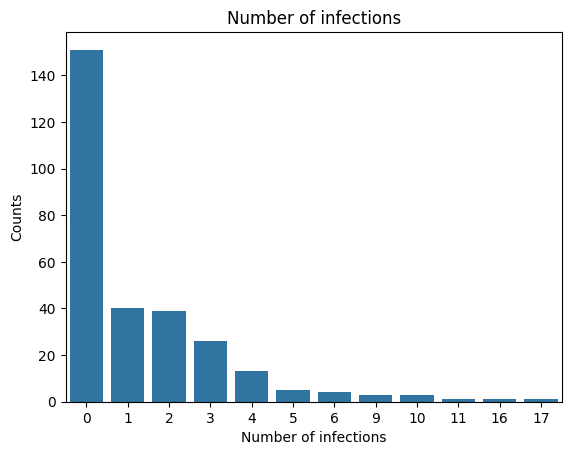

In [ ]:
fig, ax=plt.subplots()
sns.countplot(data=ear,x="infections",ax=ax)
ax.set_title('Number of infections')
ax.set_xlabel('Number of infections')
ax.set_ylabel('Counts')

plt.show()


In [ ]:
# Define the formula
model = smf.poisson("infections ~ age + swimmer + gender +	location",data=ear)
results=model.fit()

print(results.summary())

Optimization terminated successfully.
         Current function value: 1.964857
         Iterations 5
                          Poisson Regression Results                          
Dep. Variable:             infections   No. Observations:                  287
Model:                        Poisson   Df Residuals:                      281
Method:                           MLE   Df Model:                            5
Date:                Wed, 05 Feb 2025   Pseudo R-squ.:                 0.05771
Time:                        07:49:30   Log-Likelihood:                -563.91
converged:                       True   LL-Null:                       -598.45
Covariance Type:            nonrobust   LLR p-value:                 1.596e-13
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1226      0.137     -0.895      0.371      -0.391       0.146

GLMMで統一的に記載する

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
model= smf.glm("infections ~ age + swimmer + gender +	location",
               data=ear,family=sm.families.Poisson(sm.genmod.families.links.log()),
               ).fit()

print(results.summary())

                          Poisson Regression Results                          
Dep. Variable:             infections   No. Observations:                  287
Model:                        Poisson   Df Residuals:                      281
Method:                           MLE   Df Model:                            5
Date:                Fri, 24 Jan 2025   Pseudo R-squ.:                 0.05771
Time:                        07:16:15   Log-Likelihood:                -563.91
converged:                       True   LL-Null:                       -598.45
Covariance Type:            nonrobust   LLR p-value:                 1.596e-13
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1226      0.137     -0.895      0.371      -0.391       0.146
age[T.20-24]            -0.3744      0.128     -2.917      0.004      -0.626      -0.123
age[T.25-29]

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [ ]:
model= smf.glm("infections ~ age + swimmer + gender +	location",
               data=ear,family=sm.families.NegativeBinomial(sm.genmod.families.links.log()),
               )
results=model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             infections   No. Observations:                  287
Model:                            GLM   Df Residuals:                      281
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -451.07
Date:                Fri, 24 Jan 2025   Deviance:                       348.45
Time:                        07:17:04   Pearson chi2:                     396.
No. Iterations:                     7   Pseudo R-squ. (CS):            0.09739
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0718 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


課題：米国医療費調査 (NMES) データ

U.S. National Medical Expenditure Survey (NMES) data for 1987 and 1988 (data=nmes1988).
Data for individuals aged 66 and older covered by Medicare

4,406 individuals 19 variables


Using the variables below, examine the association with the number of medical visits.

Dependent variable :  Number of visits to medical institutions

Independent Variable:
Ｈospital:Length of hospitalization
Health: "poor", "average" (reference category), "excellent"
Chronic:Chronic disease
ADL:　"limited" or not "normal"
Age: Age in years (divided by 10)　10歳階級
Gender:	（M、F）
Married:（Y,N）
School:Years of Education
Income:（USD 10,000）
Insurance: Do you have private insurance?（Y,N）

In [ ]:
import pandas as pd
fpath = 'https://raw.githubusercontent.com/harabou/DS-AI_course/refs/heads/main/%2304/NMES1988.csv'

ear = pd.read_csv(fpath,header=0, encoding='shift-jis')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

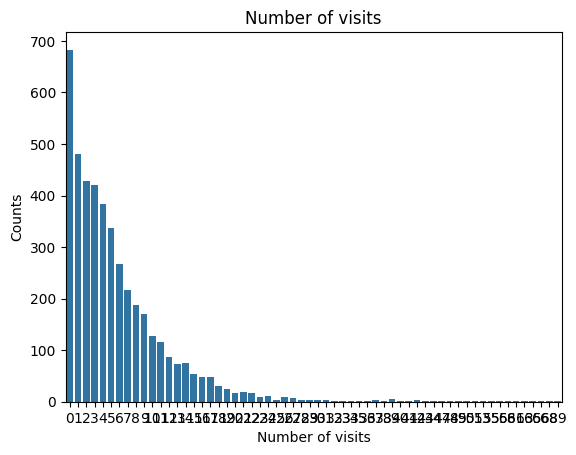

In [ ]:
fig, ax=plt.subplots()
sns.countplot(data=ear,x="visits",ax=ax)
ax.set_title('Number of visits')
ax.set_xlabel('Number of visits')
ax.set_ylabel('Counts')

plt.show()

In [ ]:
model= smf.glm("visits ~ hospital + health + chronic + adl + age+ gender + married + school +income + insurance",
               data=ear,family=sm.families.Poisson(sm.genmod.families.links.log()),
               ).fit()

print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             infections   No. Observations:                  287
Model:                            GLM   Df Residuals:                      281
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -451.07
Date:                Fri, 24 Jan 2025   Deviance:                       348.45
Time:                        07:51:16   Pearson chi2:                     396.
No. Iterations:                     7   Pseudo R-squ. (CS):            0.09739
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0718 

In [ ]:
model= smf.glm("visits ~ hospital + health + chronic + adl + age+ gender + married + school +income + insurance",
               data=ear,family=sm.families.NegativeBinomial(sm.genmod.families.links.log()),
               ).fit()

print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             infections   No. Observations:                  287
Model:                            GLM   Df Residuals:                      281
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -451.07
Date:                Fri, 24 Jan 2025   Deviance:                       348.45
Time:                        07:51:51   Pearson chi2:                     396.
No. Iterations:                     7   Pseudo R-squ. (CS):            0.09739
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0718 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
